##### Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, model_selection
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing the datasets

In [2]:
train=pd.read_excel('Data_Train.xlsx')

##### Preprocessing

###### Knowing about data's

In [3]:
train.shape

(6019, 13)

In [4]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [5]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [6]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 3.4 MB


###### Droping the variable having more missing Data's

In [9]:
train.drop('New_Price',1,inplace=True)

##### Missing Value treatment

In [10]:
Missing_Variables=train.columns[train.isnull().any()]
Missing_Variables

Index(['Mileage', 'Engine', 'Power', 'Seats'], dtype='object')

In [11]:
for object in Missing_Variables:
    train[object].fillna(train[object].mode()[0], inplace=True)

##### EDA

###### Target Exploration

In [12]:
train['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

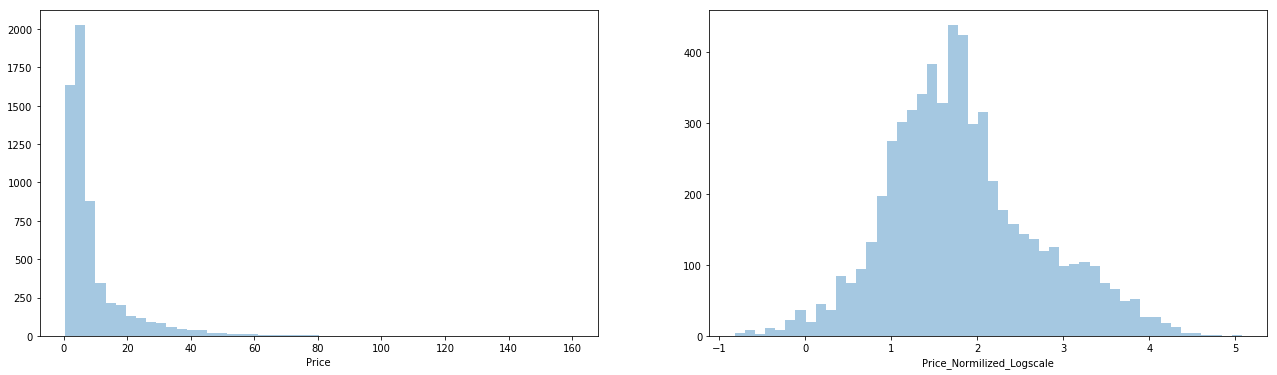

In [13]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.distplot(train['Price'], kde = False, bins = 50)
plt.xlabel('Price')

# Feature Scaling
train['Price_log']= np.log(train['Price'].values)
plt.subplot(122)
sns.distplot(train['Price_log'], kde = False, bins = 50)
plt.xlabel('Price_Normilized_Logscale')
plt.show()

##### Univariate Analysis

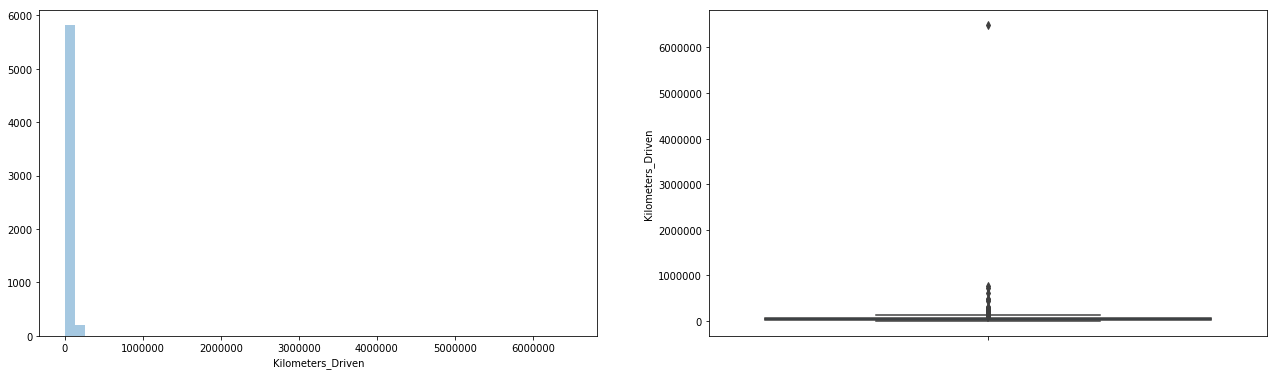

In [14]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.distplot(train['Kilometers_Driven'], kde = False, bins = 50)
plt.subplot(122)
sns.boxplot(train['Kilometers_Driven'], orient='vertical')

######  Inference from Above Plots
1. Its not posible that the car is driven for 60Lakh Kilometer
2. Its very rare that anyone buying car which is driven for more than 2Lakh Kilometer, So modifying data accordingly

In [15]:
train=train[train.Kilometers_Driven < 200000]
train.reset_index(drop=True,inplace=True)

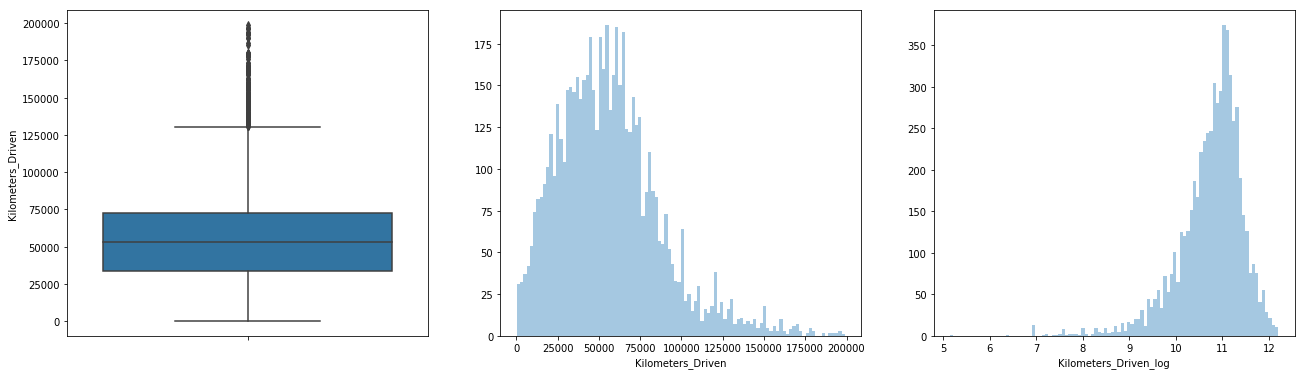

In [16]:
plt.figure(figsize=(22, 6))
plt.subplot(131)
sns.boxplot(train['Kilometers_Driven'], orient='vertical')
plt.subplot(132)
sns.distplot(train['Kilometers_Driven'], kde = False, bins = 100)

# Feature Scaling
train['Kilometers_Driven_log']= np.log(train['Kilometers_Driven'].values)

plt.subplot(133)
sns.distplot(train['Kilometers_Driven_log'], kde = False, bins = 100)

Text(0, 0.5, 'Frequency')

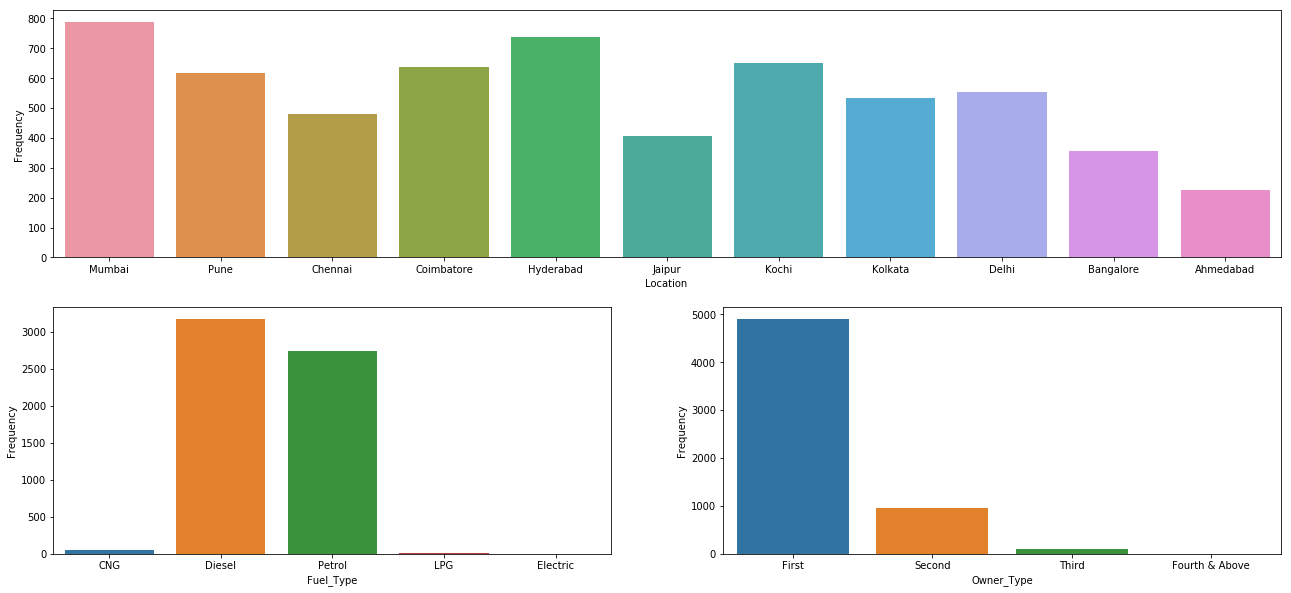

In [17]:
# Binary Features
plt.figure(figsize=(22, 10))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(2,2,(1,2))
sns.countplot(train['Location'])
plt.xlabel('Location ')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(2,2,3)
sns.countplot(train['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(2,2,4)
sns.countplot(train['Owner_Type'])
plt.xlabel('Owner_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

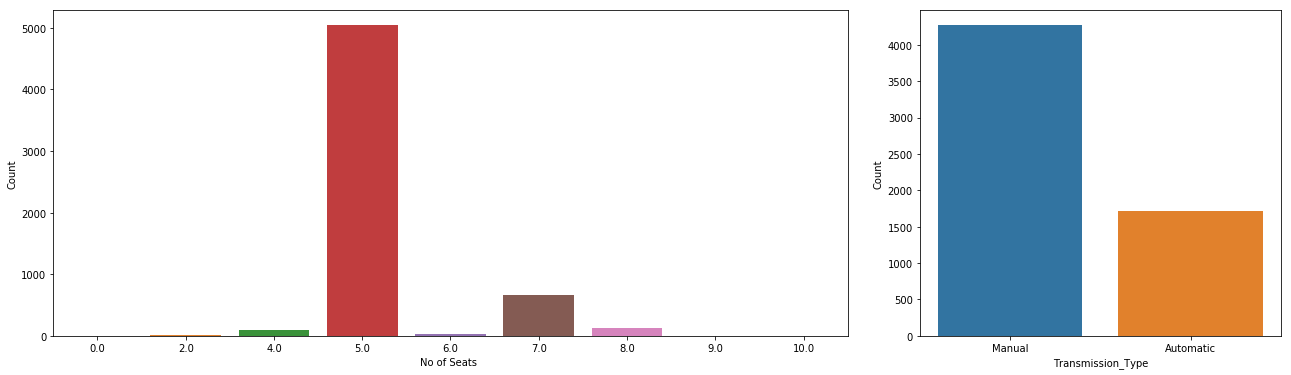

In [18]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(1,3,(1,2))
sns.countplot(train['Seats'])
plt.xlabel('No of Seats ')
plt.ylabel('Count')


# vendor_id
plt.subplot(1,3,3)
sns.countplot(train['Transmission'])
plt.xlabel('Transmission_Type')
plt.ylabel('Count')

###### Extracting the Numeric data from Categorical data

In [19]:
import re
def extractNumeric(data):
    try:
        return re.findall('\d*\.?\d*',data)[0]
    except:
        return 0

In [20]:
train['Mileage']=train['Mileage'].apply(lambda X: extractNumeric(X))
train['Mileage'] = pd.to_numeric(train['Mileage'], downcast="float")
train['Mileage']=train['Mileage'].apply(lambda x: round(x,2))

In [21]:
train['Engine']=train['Engine'].apply(lambda X: extractNumeric(X))
train['Engine'] = pd.to_numeric(train['Engine'], downcast="integer")

In [22]:
# In Power it is Identified that its is mentioned as 'null bhp' if it extracted it will be converted to NaN values so we are replacing as '0 bhp'
train['Power'].replace('null bhp','0 bhp',inplace=True)
train['Power']=train['Power'].apply(lambda X: extractNumeric(X))
train['Power'] = pd.to_numeric(train['Power'], downcast="float")
train['Power']=train['Power'].apply(lambda x: round(x,2))

###### Few Mileage and Power Datset contains '0 Values' is it possible?

In [23]:
train.loc[train['Mileage'] == 0, 'Mileage'] = train.loc[:,"Mileage"].mean()
train.loc[train['Power'] == 0, 'Power'] = train.loc[:,"Power"].mean()

In [24]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_log,Kilometers_Driven_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,0.559616,11.184421
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,2.525729,10.621327
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,1.504077,10.736397
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,1.791759,11.373663
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,2.875822,10.613246


C:\Users\SJMB\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

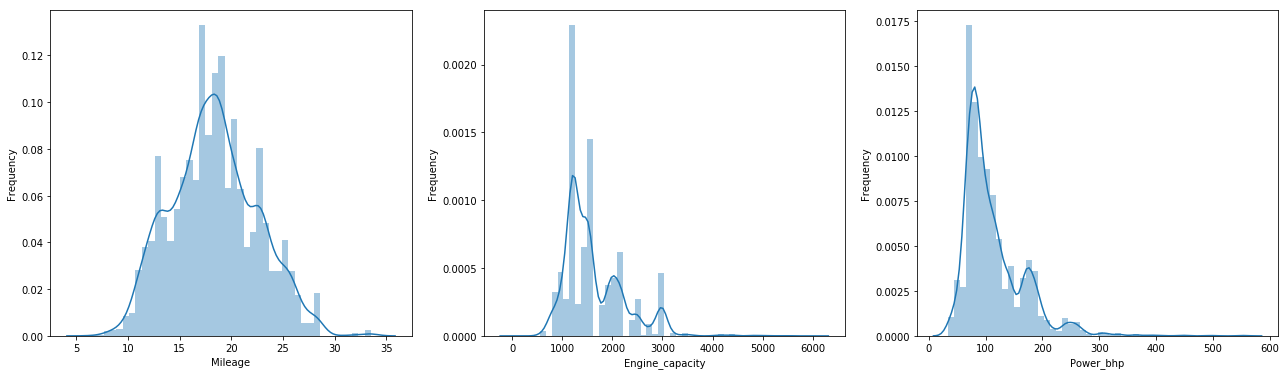

In [25]:
plt.figure(figsize=(22, 6))

plt.subplot(131)
sns.distplot(train['Mileage'])
plt.xlabel('Mileage')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.distplot(train['Engine'])
plt.xlabel('Engine_capacity')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.distplot(train['Power'])
plt.xlabel('Power_bhp')
plt.ylabel('Frequency')


In [26]:
train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Price_log,Kilometers_Driven_log
Year,1.000000,-0.503585,0.289360,-0.043835,0.018976,0.026563,0.303727,0.502561,-0.498453
Kilometers_Driven,-0.503585,1.000000,-0.145882,0.164846,0.003926,0.216301,-0.187325,-0.213743,0.878261
Mileage,0.289360,-0.145882,1.000000,-0.636701,-0.547875,-0.338005,-0.332771,-0.301318,-0.124391
Engine,-0.043835,0.164846,-0.636701,1.000000,0.862556,0.388975,0.660134,0.687887,0.139898
Power,0.018976,0.003926,-0.547875,0.862556,1.000000,0.103584,0.768101,0.754159,0.012554
Seats,0.026563,0.216301,-0.338005,0.388975,0.103584,1.000000,0.056247,0.167927,0.179932
Price,0.303727,-0.187325,-0.332771,0.660134,0.768101,0.056247,1.000000,0.850976,-0.190960
Price_log,0.502561,-0.213743,-0.301318,0.687887,0.754159,0.167927,0.850976,1.000000,-0.205826
Kilometers_Driven_log,-0.498453,0.878261,-0.124391,0.139898,0.012554,0.179932,-0.190960,-0.205826,1.000000


##### Bivariate Analysis

###### Continuous - Continuous 

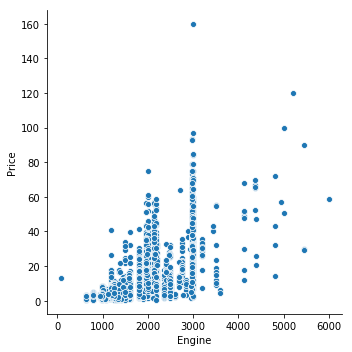

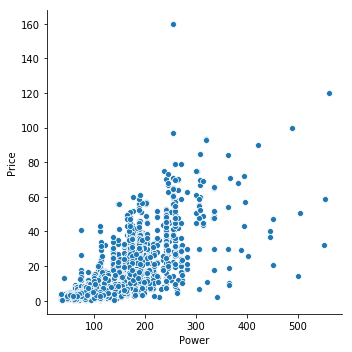

In [27]:
sns.relplot(x="Engine", y="Price", data=train, kind="scatter")
sns.relplot(x="Power", y="Price", data=train, kind="scatter")

In [28]:
train['Price'].corr(train['Power']),train['Price'].corr(train['Engine'])

(0.7681012710354262, 0.6601340929516224)

###### Categorical - Continuous

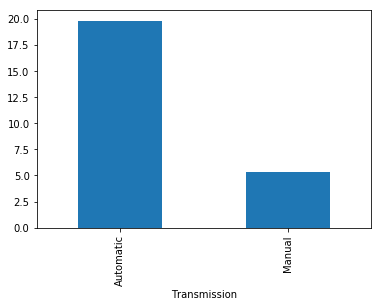

In [29]:
train.groupby('Transmission')['Price'].mean().plot.bar()

In [30]:
from scipy.stats import ttest_ind

In [31]:
Automatic=train[train['Transmission']=='Automatic']

In [32]:
Manual=train[train['Transmission']=='Manual']

In [33]:
ttest_ind(Automatic['Price'],Manual['Price'],nan_policy='omit')

Ttest_indResult(statistic=55.934699385266505, pvalue=0.0)

###### Categorical - Categorical

In [34]:
pd.crosstab(train['Transmission'],train['Owner_Type'])

Owner_Type,First,Fourth & Above,Second,Third
Transmission,,,,
Automatic,1405,1,284,25
Manual,3504,5,672,86


In [35]:
from scipy.stats import chi2_contingency

In [36]:
chi2_contingency(pd.crosstab(train['Transmission'],train['Owner_Type']))

(2.982608299472408,
 0.39431441439071435,
 3,
 array([[1.40737797e+03, 1.72016048e+00, 2.74078903e+02, 3.18229689e+01],
        [3.50162203e+03, 4.27983952e+00, 6.81921097e+02, 7.91770311e+01]]))

##### Correlation Heatmap

In [37]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Price_log', 'Kilometers_Driven_log'],
      dtype='object')

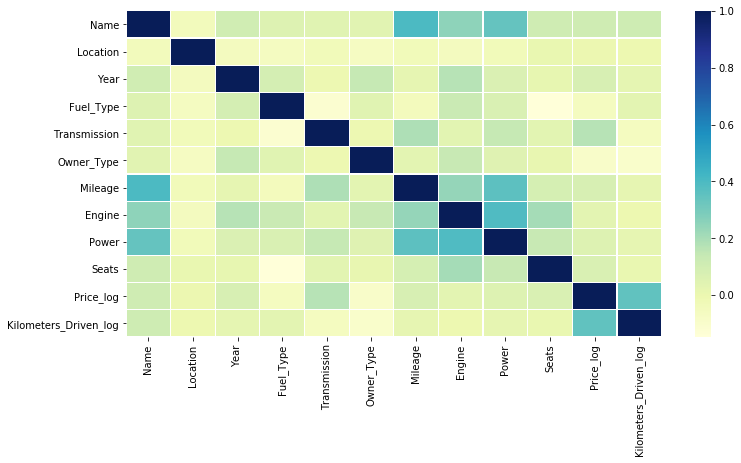

In [38]:
plt.figure(figsize=(12, 6))
df = train.drop(['Kilometers_Driven','Price'], axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

In [39]:
train.to_csv('Feature Engineered Data.csv',index=False)

In [40]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')


In [41]:
categorical_variables=categorical_variables.tolist()
categorical_variables

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [42]:
for col in categorical_variables:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))

Name
Location
Fuel_Type
Transmission
Owner_Type


In [43]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_log,Kilometers_Driven_log
0,1197,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75,0.559616,11.184421
1,510,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50,2.525729,10.621327
2,484,2,2011,46000,4,1,0,18.20,1199,88.70,5.0,4.50,1.504077,10.736397
3,1056,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00,1.791759,11.373663
4,23,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74,2.875822,10.613246


##### Segregating variables: Independent and Dependent Variables

In [44]:
X=train.drop(['Price','Price_log','Kilometers_Driven'],1)
y=train.Price

In [45]:
train.to_csv('Feature Engineered Data.csv',index=False)

##### Splitting the data into train set and the test set

In [92]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = 56)

##### Model Building_LinearRegression

In [93]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [94]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 3.763586117679124


In [96]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     3.6715035754542993


In [97]:
lr.coef_

array([ 1.69433182e-04, -2.25515365e-01,  7.70760116e-01, -9.82274293e-01,
       -2.50747424e+00,  2.04116505e-02, -1.56217955e-01,  1.54635511e-03,
        1.22256017e-01, -1.07733555e+00, -1.84089931e+00])

Text(0.5, 1.0, 'Coefficient plot')

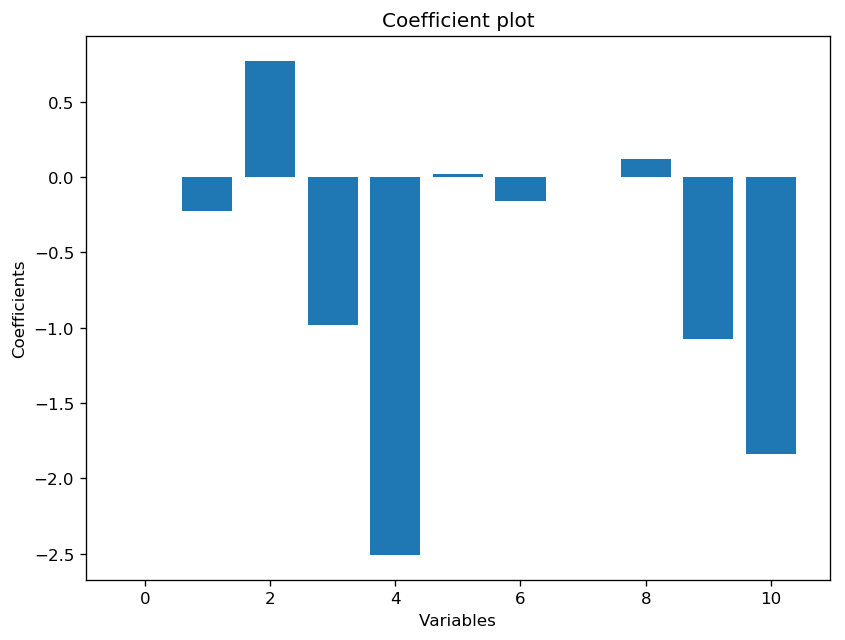

In [98]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

##### Checking assumptions of Linear Model

In [99]:
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
3118,3.38,0.841770,2.538230
113,11.11,10.546750,0.563250
4391,5.75,7.730942,-1.980942
4572,36.64,29.405298,7.234702
2949,5.95,7.203645,-1.253645


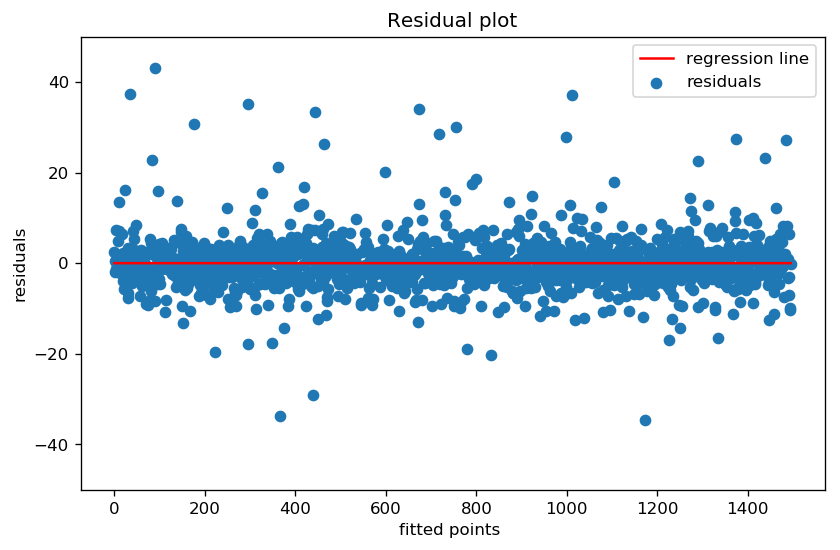

In [105]:
plt.figure(figsize=(8, 5), dpi=120, facecolor='w', edgecolor='b')
f = range(0,1496)
k = [0 for i in range(0,1496)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-50, 50)
plt.legend()

###### Is there constant Variance OR Homoscedastic?
The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant

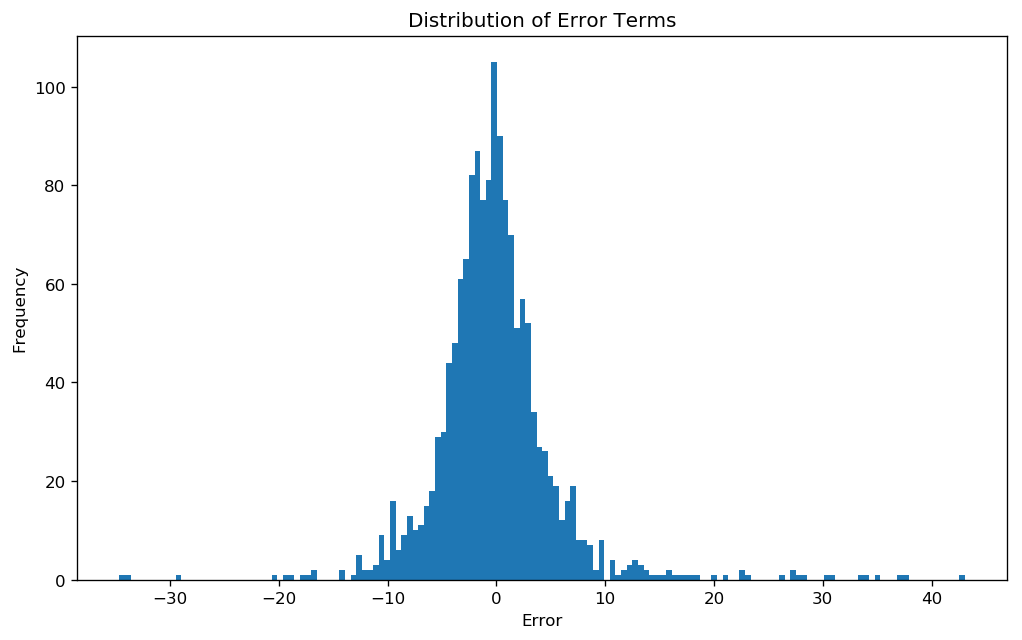

In [106]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

###### Checking Distribution of Residuals
According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors

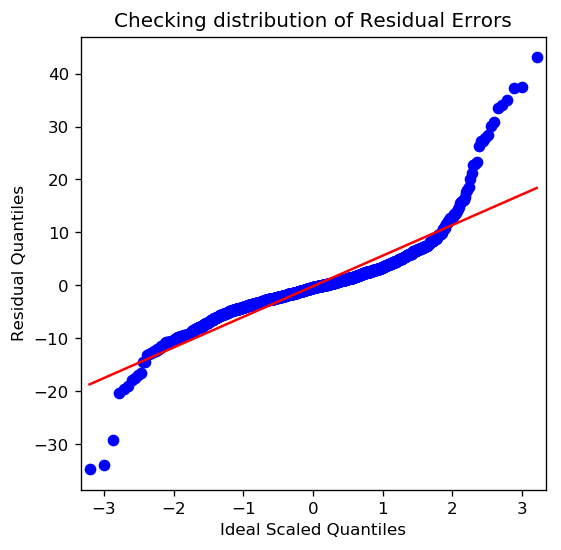

In [107]:
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

##### Is the data Normally Distributed?
The **QQ-plot** clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.